In [ ]:
# data downloaded from www.ncdc.noaa.gov.
# select city and plot the graph
# then download csv.

In [1]:
import pandas as pd

In [2]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [3]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [4]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [5]:
# Modify column names. Change Value to Temperature 
# modify data in first column
# all of the data is for January. So we do not need 01 at the end of the date

In [6]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [7]:
nyc.head(2)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7


In [8]:
# now change the data in Date column
# first check the type of attribute

In [9]:
nyc.Date.dtype

dtype('int64')

In [10]:
nyc.Date = nyc.Date.floordiv(100)

In [11]:
nyc.head()

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0


In [12]:
pd.set_option('precision', 2) # setting precision for floating point

In [13]:
# use describe method available in Series as well as Dataframe.
nyc.Temperature.describe()
# total records 124
# average is 37.60

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [14]:
# Now using scipy - Scientific Python. Key library in anaconda python distribution
# use stats moduele in scipy for statistical calculations

In [15]:
from scipy import stats
# stats.linregress module will automatically calculate optimal values 
# for slope and y interface to plot the line for prediction
# It uses least squares method to find out the same.



In [16]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [17]:
linear_regression.slope

0.014771361132966163

In [18]:
linear_regression.intercept

8.694993233674289

In [19]:
# Now that you have slope and intercept 
# you can use this information to make predictions
# using y = mx + c 
# m is slope
# x is year valye
# c is y intercept
# y is temperature
# below is the prediction for year 2019 jan.
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [20]:
# and for year 1890
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [21]:
# using seaborn for plotting regression line
# seaborn regplot function not only does linear regression but also plots the data
import seaborn as sns

(10.0, 70.0)

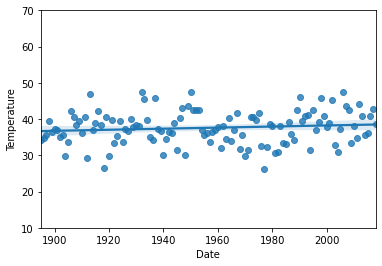

In [22]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)
# axes.set_ylim - change y axis limits 
# this will make the records appear tightly packed when range is smaller.
# From the graph it appears to be increasing temperature trend in NewYork city from 1900 to 2028
# shaded area indicates 95 % certainity of prediction range.